# ZomatoDataAnalysis Project

Zomato has an average of 17.5 million monthly
transacting customers for its food delivery business. An
average monthly active food delivery restaurant
partners on Zomato's platform have also increased by
8.7% year-on-year, from 208,000 to 226,000. I have obtained this dataset from KAGGLE. As a data enthusiast I'll try to analyze the data, perform EDA (Exploratory
Data Analysis) and visualization, and I'll try to answer the
following questions in order to analyse efficiently:-

1) What type of restaurant do the majority of customers order from?

2) How many votes has each type of restaurant received from customers?

3) What are the ratings that the majority of restaurants have received?

4)  Zomato has observed that most couples order most of their food online. What is their
average spending on each order?

5) Which mode (online or offline) has received the maximum rating?

6) Which type of restaurant received more offline orders, so that Zomato can provide those
customers with some good offers?

For Analysis, I'll be using Python and its important data analysis libraries like Pandas, Numpy, Seaborn and Matplotlib.

Now, Let us begin.



importing important libraries:-

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Zomato data .csv")

Lets view the dataframe created:-

In [4]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


Change the format of 'rate' column to float type and remove slash:-

In [5]:
def changerate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

df['rate'] = df['rate'].apply(changerate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


Lets see a summary of the dataframe:-

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Let's create a graph to see the different type of restaurants and their count.(x:typeofrestaurent, y:count)

Text(0.5, 0, 'Type of Restaurant')

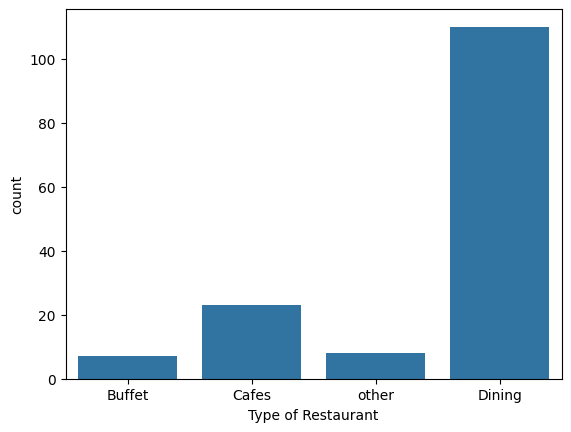

In [8]:
sns.countplot(x = df['listed_in(type)'])
plt.xlabel('Type of Restaurant')              

Conclusion:- The majority of restaurants fall into the category of 'Dining', 
'Buffet' restaurants are least in the city.

.

Now, To understand about the specific type restaurants and people's prefference towards them, let's create a graph to understand that practically

Text(0, 0.5, 'Votes')

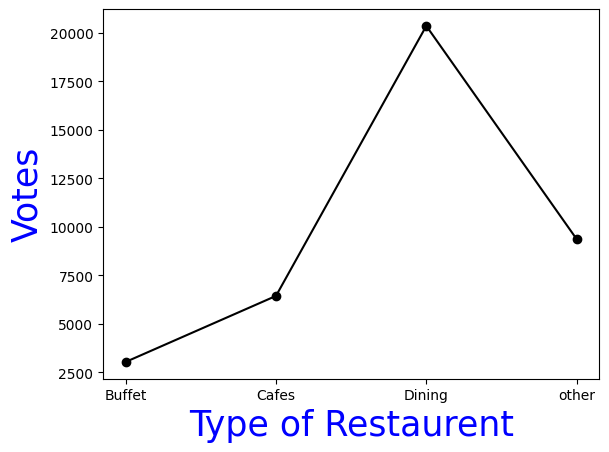

In [11]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data})
plt.plot(result, c='Black', marker='o')
plt.xlabel('Type of Restaurent',c='Blue',size=25)
plt.ylabel('Votes',c='Blue',size=25)

Conclusion:- Dining Restaurants are preffered by the majority of people in the city and has received the most vote.

.

Let's create a Histogram to visually understand the different ratings received by their customers on Zomato.

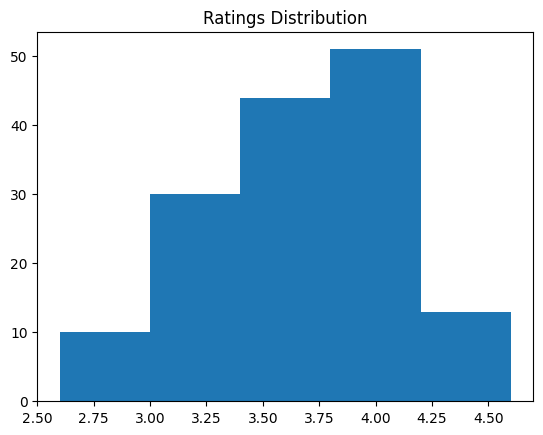

In [13]:
plt.hist(df['rate'],bins=5)
plt.title('Ratings Distribution')
plt.show()

Conclusion:- A majority of restaurants have received ratings between 3.75 and 4.00 

.

Let's create a CountPlot to visually understand the average spending of people on orders from Zomato.

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

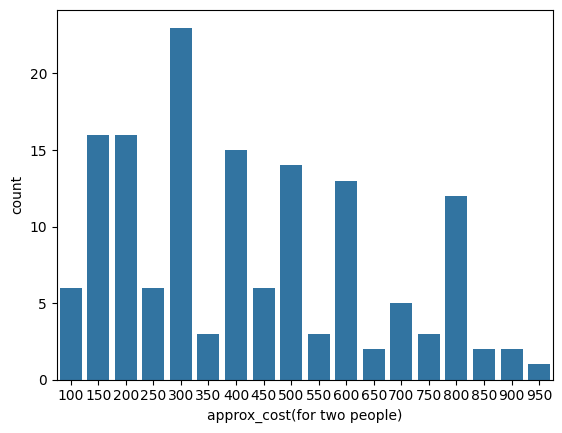

In [15]:
couple_data = df['approx_cost(for two people)']
sns.countplot(x = couple_data)

Conclusion:- The majority of couples prefer restaurants with an approximate cost of 300 Rupees.

.

Let's create a BoxPlot to understand which among online orders and offline orders have received more ratings visually.

<Axes: xlabel='online_order', ylabel='rate'>

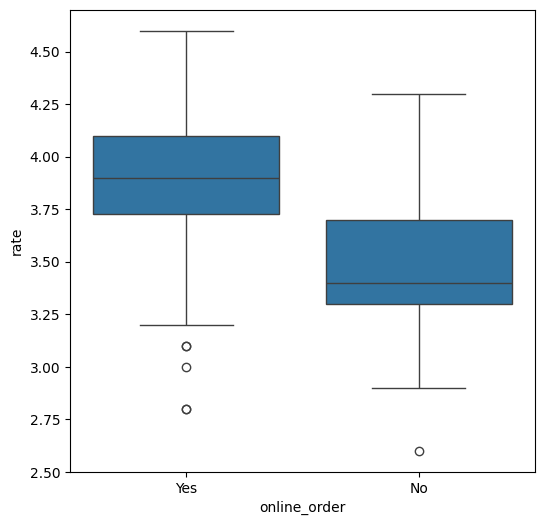

In [16]:
plt.figure(figsize=(6,6))
sns.boxplot(x = 'online_order',y = 'rate',data=df)


Conclusiom:- Offline orders received lesser ratings in comparison to online orders, which obtained excellent ratings.

.

Let's create a Heatmap to understand the situation in Question 6, and to answer more confidently.

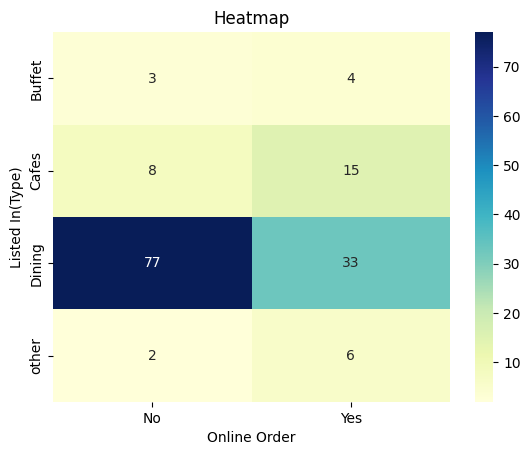

In [22]:
pivot_table = df.pivot_table(index = 'listed_in(type)', columns = 'online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot= True,cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In(Type)')
plt.show()

Conclusion:- Dining Restaurants primarily accept offline orders, whereas cafes primarily receive online orders.This suggests that customers prefere to place orders in person at restaurants and order online from cafes.